# Task 2 - Movie Rating Prediction

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# 1. Read Data and Data Exploration

In [2]:
import pandas as pd
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
# check row/column count, column names, column-wise not null value count, column data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### Handling duplicate entries

In [4]:
# check if any duplicate entries
df[df.duplicated()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1250,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1769,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
4723,First Time - Pehli Baar,(2009),NaN,NaN,NaN,NaN,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
9713,Musafir,NaN,NaN,Thriller,NaN,NaN,Shiva Dagar,NaN,NaN,NaN
13069,Shivani,(2019),NaN,Crime,NaN,NaN,Ugresh Prasad Ujala,Santosh,NaN,NaN
13308,Slumdog Karodpati,(2019),118 min,Thriller,NaN,NaN,Rajesh Patole,Udhav Garje,Rahul Gavane,Govindrao


In [5]:
# delete duplicated rows identified
df.drop_duplicates(inplace=True)

In [6]:
# verfiy if duplicates removed
df.duplicated().sum()

0

### Handling missing values

#### For this dataset, we will have to dropp the missing values

In [7]:
# check missing value count
df.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [8]:
# convert the missing value count to % to check the proportion
na_per1 = round((df.isna().sum() * 100 / df.count()),1)
na_per1

Name          0.0
Year          3.5
Duration    114.2
Genre        13.8
Rating       95.8
Votes        95.7
Director      3.5
Actor 1      11.6
Actor 2      18.1
Actor 3      25.4
dtype: float64

In [9]:
# drop missing values in df
df.dropna(axis=0, inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [10]:
# verfiy the above action
na_per2 = round((df.isna().sum() * 100 / df.count()),1)
na_per2

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

### Converting datatypes 

#### per the df info, we can see that the data type for columns - Year, Duration and Votes is 'object'. We need these column as numeric (int/float) data type for our analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [12]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [13]:
# Year Column - removing the round brackets and converting to integer data type

df["Year"]=df['Year'].str[1:-1].astype(int)

In [14]:
# Duration Column - removing the suffix ' min' and converting to integer data type

df['Duration']=df['Duration'].str.replace(' min','').astype(float)

In [15]:
# Votes Column - Observed a value '$5.16M' in Votes column which should be replaced with '5160000'

df['Votes'] = df['Votes'].replace('$5.16M', '5160000')

In [16]:
# Votes Column - Remove ',' and convert the column data type to integer

df['Votes'] = df['Votes'].str.replace(',','').astype(int) 

#### verify the df info after data type conversion

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   float64
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 442.1+ KB


# 2. Descriptive Analysis

In [18]:
# Descriptive analysis for numderical data columns
df.describe().round(1)

,Year,Duration,Rating,Votes
count,5659.0,5659.0,5659.0,5659.0
mean,1996.2,133.4,5.9,2697.6
std,19.7,25.3,1.4,13651.5
min,1931.0,21.0,1.1,5.0
25%,1983.0,119.0,5.0,30.0
50%,2002.0,135.0,6.1,131.0
75%,2013.0,150.0,6.9,922.5
max,2021.0,321.0,10.0,591417.0


### Observations 1:

1. Year movies released ranges from 1931 to 2021
2. Duration (in minutes) of movies ranges from 21 to 321, with average movie duration of 133.4 minutes
3. Rating (1-10) of movies ranges from 1.1 t0 10, with average movie rating of 5.9
4. Votes (count of votes) ranges from 5 to 5,91,417, with average of 2697 votes

#### Conclusion: We need look into the data distribution and check if there is any correlation with any of the features in the df

In [19]:
# Descriptive analysis for Categorical(string) data columns
df.describe().round(1)
df.describe(include='object')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659,5659
unique,5385,376,2431,1960,2321,2556
top,Baazi,Drama,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,844,41,104,52,57


### Observations 2:

1. Most of the movies were directed by David Dhwan with 41 movies
2. Most of the movies has actors (in each of the actor columns) Amitabh Bachchan, Rekha and Pran with 104, 52 and 57 movies respectively
3. Most of the movies were from Drama genre with 844 movies

#### Conclusion: We need to further try to look into Genre columns as it has combinational genres. Also, check if there is any correlation with any of the features in the df

# 3. Data Visualization

In [20]:
# Count of movies with <=5 rating
count5 = len(df[df['Rating'] <= 5])
count5

1482

In [21]:
# Percent of movies with <=5 rating
percent5 = print(f"{(count5/len(df)*100):.2f}")
percent5

26.19


In [22]:
rating_bins = list(range(0, 11,1))
rating_bins

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [23]:
# check count # of movies in each rating category
count_rating_bin = df.groupby(pd.cut(df['Rating'], bins=rating_bins)).size()

# check the above count in percent
percent_rating_bin = ((count_rating_bin/(count_rating_bin.sum()))*100).round(2)

# Get count and percent for each rating category
groupby_rating_bin = pd.DataFrame({'Count':count_rating_bin, 'Percent':percent_rating_bin})
groupby_rating_bin

,Count,Percent
Rating,,
"(0, 1]",0,0.00
"(1, 2]",20,0.35
"(2, 3]",144,2.54
"(3, 4]",455,8.04
"(4, 5]",863,15.25
"(5, 6]",1288,22.76
"(6, 7]",1677,29.63
"(7, 8]",1008,17.81
"(8, 9]",186,3.29


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

### Plotting Count plot for rating under each bin

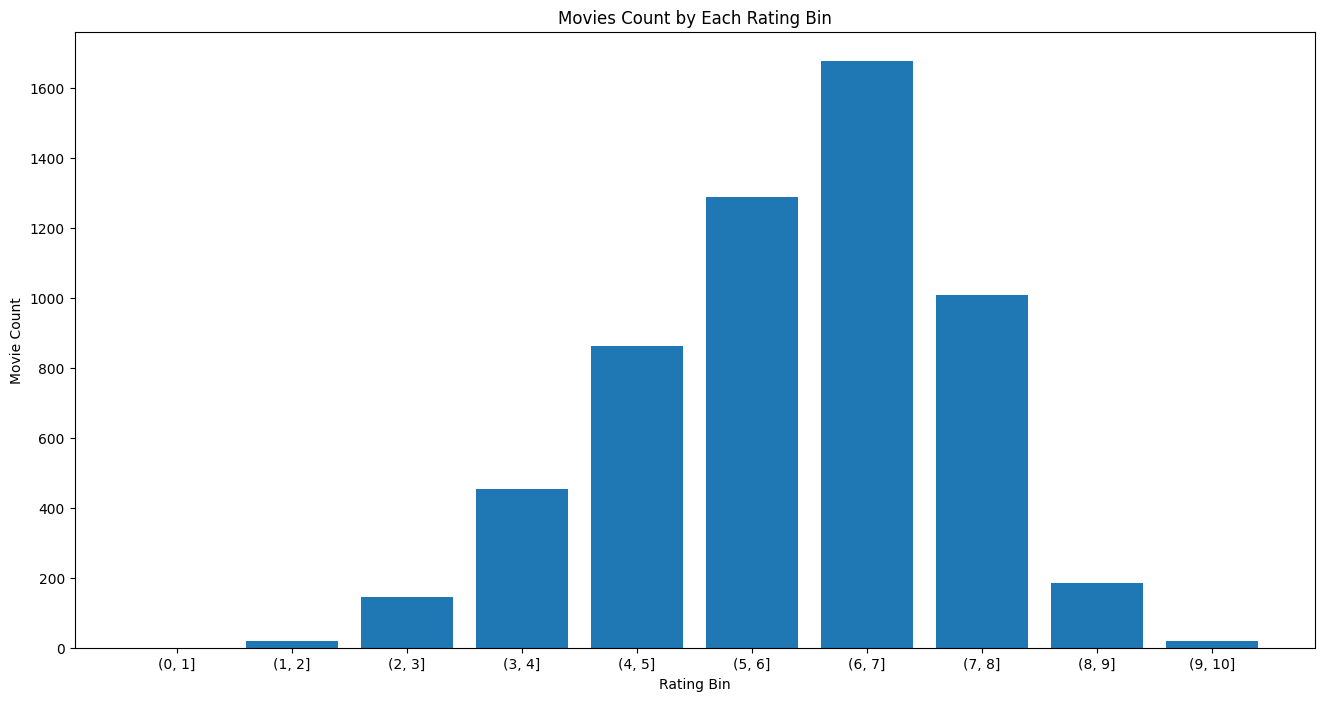

In [25]:
# creating bin labels for x-axis
rating_label = [str(bin) for bin in count_rating_bin.index]

# Plotting bar chart 
plt.figure(figsize=(16,8))
plt.bar(rating_label, count_rating_bin.values)
plt.xlabel('Rating Bin')
plt.ylabel('Movie Count')
plt.title('Movies Count by Each Rating Bin')
plt.show()

In [26]:
con = list(df.columns[df.dtypes!='object'])
con

['Year', 'Duration', 'Rating', 'Votes']

### Plotting histogram to check distribution of Year, Duration, Rating and Votes

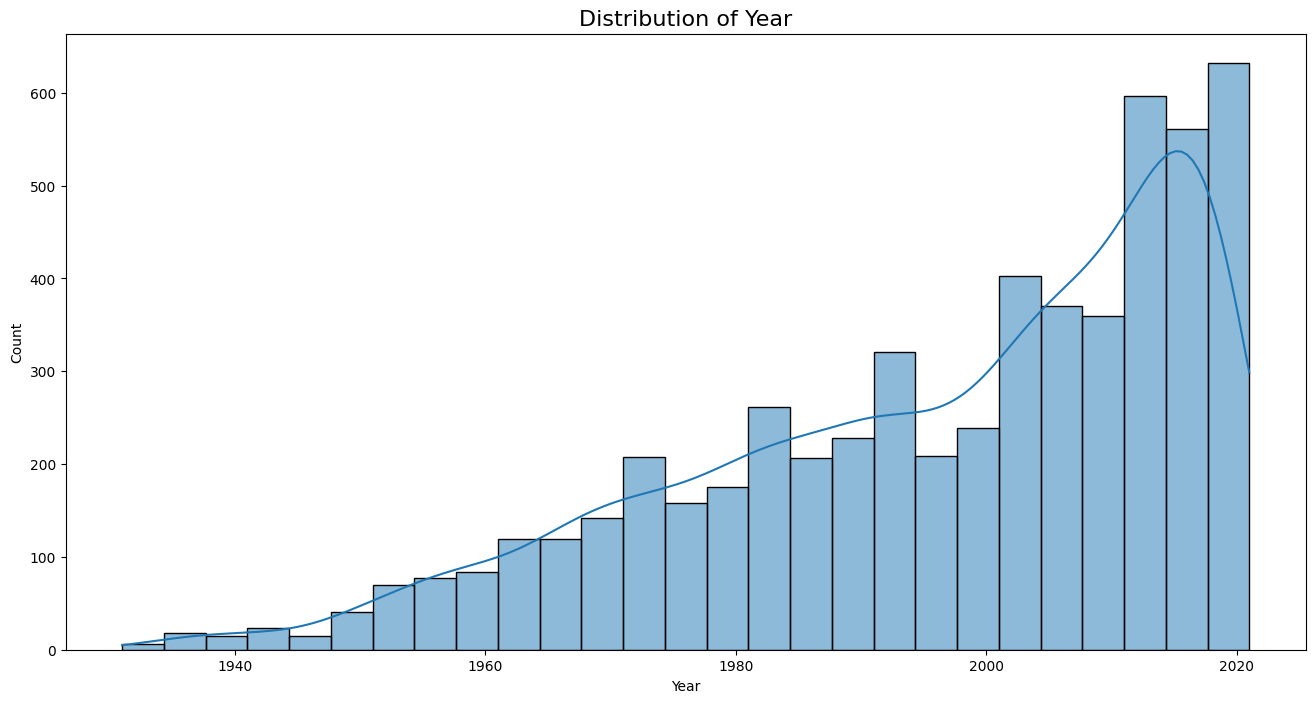

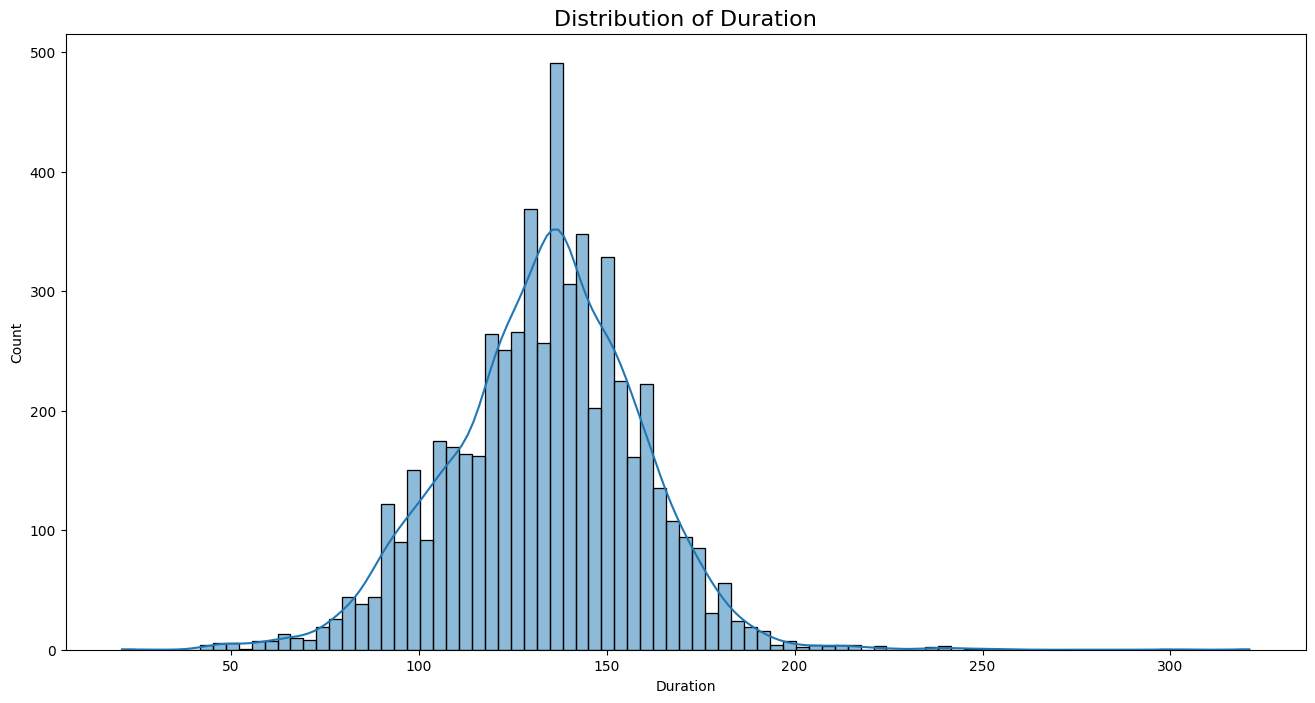

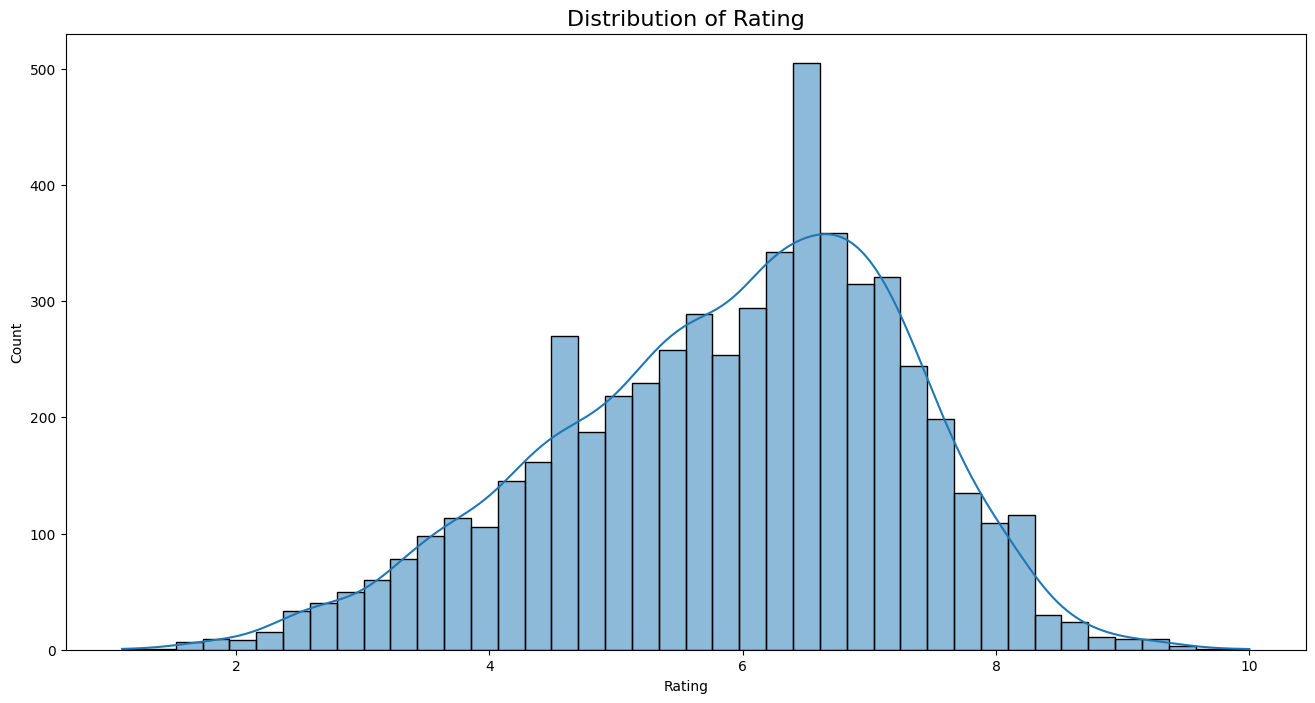

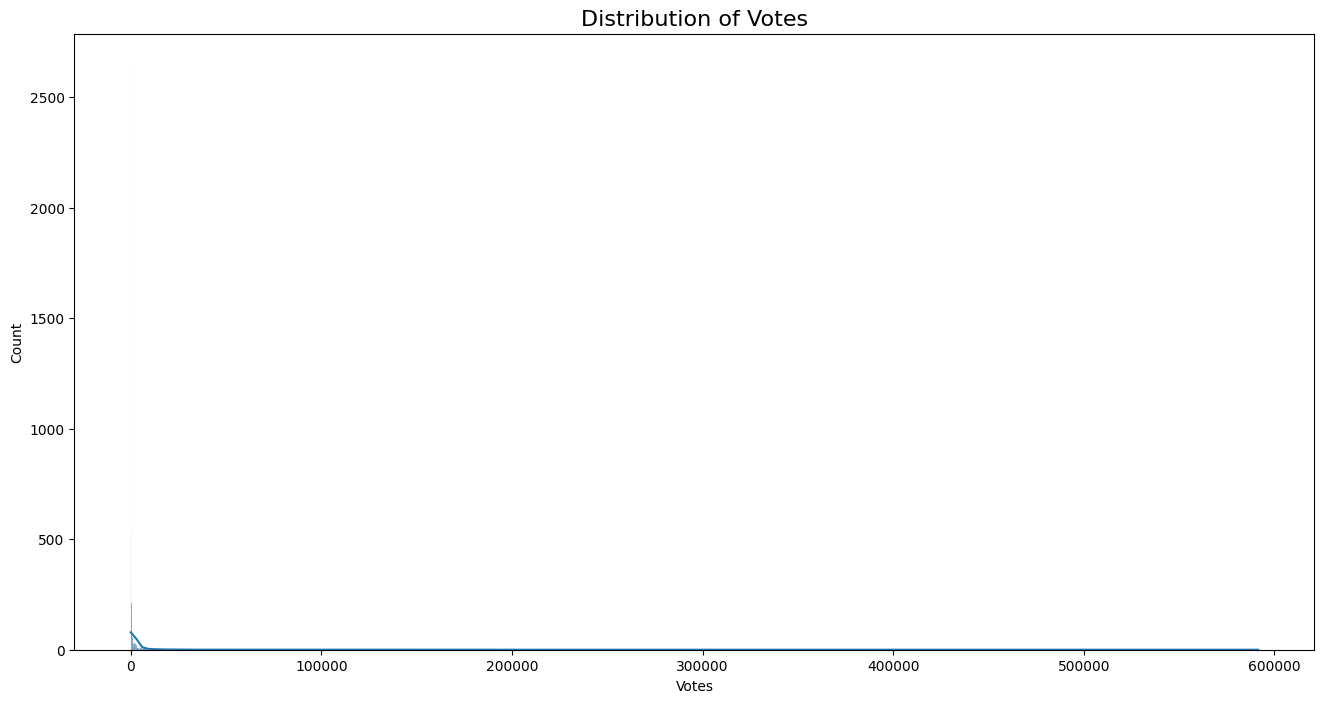

In [27]:
for i in con:

    plt.figure(figsize=(16,8))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Distribution of {i}', fontsize=16)
    # plt.xticks(range(0,11,1))
    plt.show()

In [28]:
# Total genre categories in Genre column
df['Genre'].nunique()

376

In [29]:
# Top Genres with more than 100 movies
df['Genre'].value_counts().head(15)

Genre
Drama                      844
Drama, Romance             332
Action, Crime, Drama       329
Action, Drama              206
Comedy, Drama              205
Comedy, Drama, Romance     188
Comedy                     187
Action                     170
Drama, Family              160
Romance                    126
Action, Comedy, Drama      118
Comedy, Romance            107
Action, Drama, Romance     107
Drama, Musical, Romance     93
Thriller                    84
Name: count, dtype: int64

In [30]:
# Total Directors

df['Director'].nunique()

2431

In [31]:
# Top 10 directors with highest movies
df['Director'].value_counts().head(10)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Name: count, dtype: int64

In [32]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [33]:
cat = list(df.columns[df.dtypes=='object'])
cat.remove('Name')
cat

['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

### Plotting Bar Chart for Top 15 Director and Actors by Movie Count

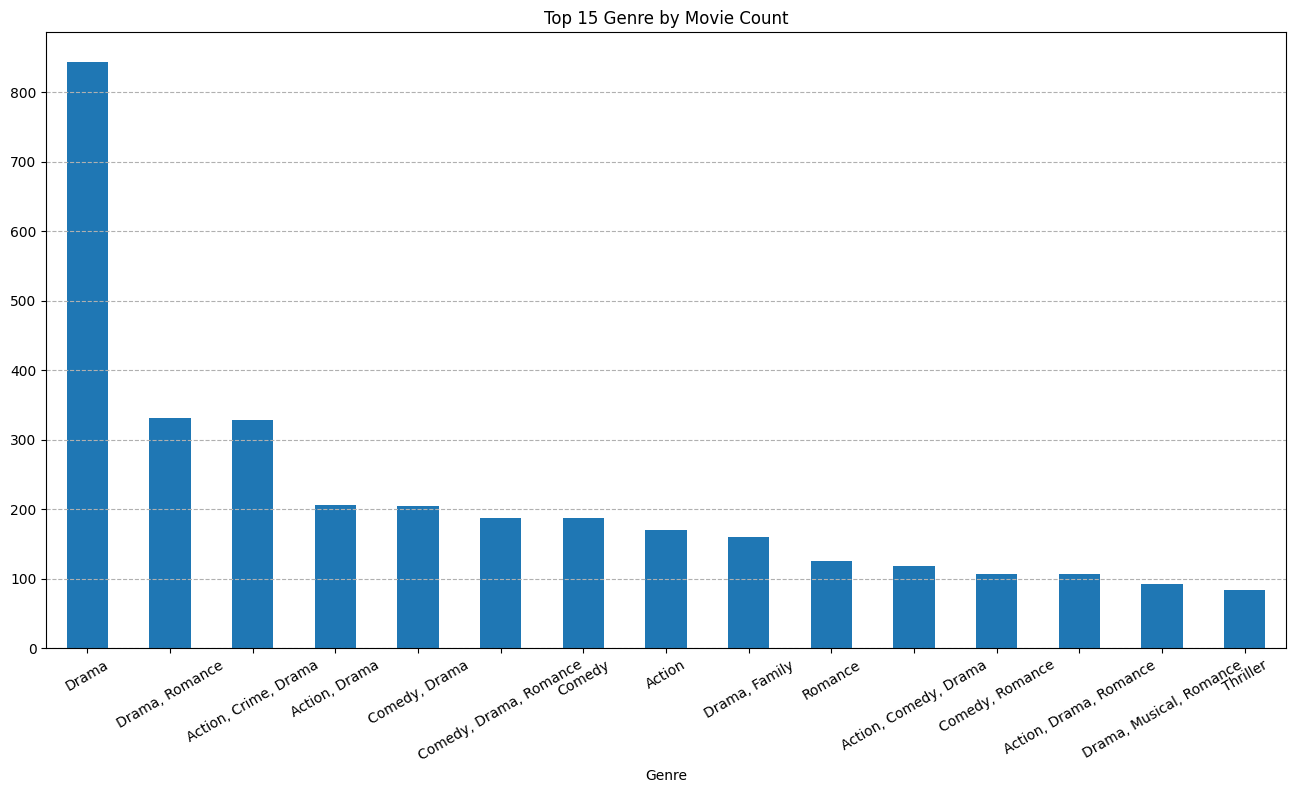

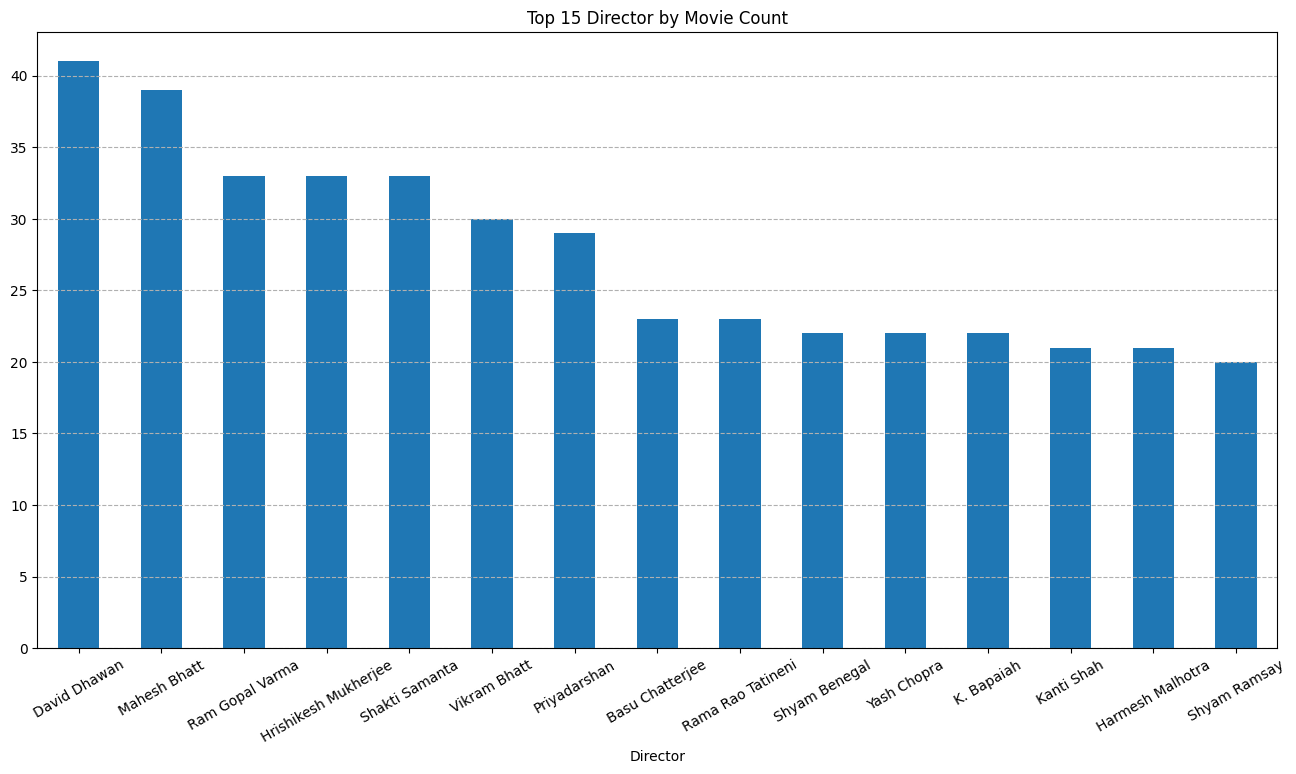

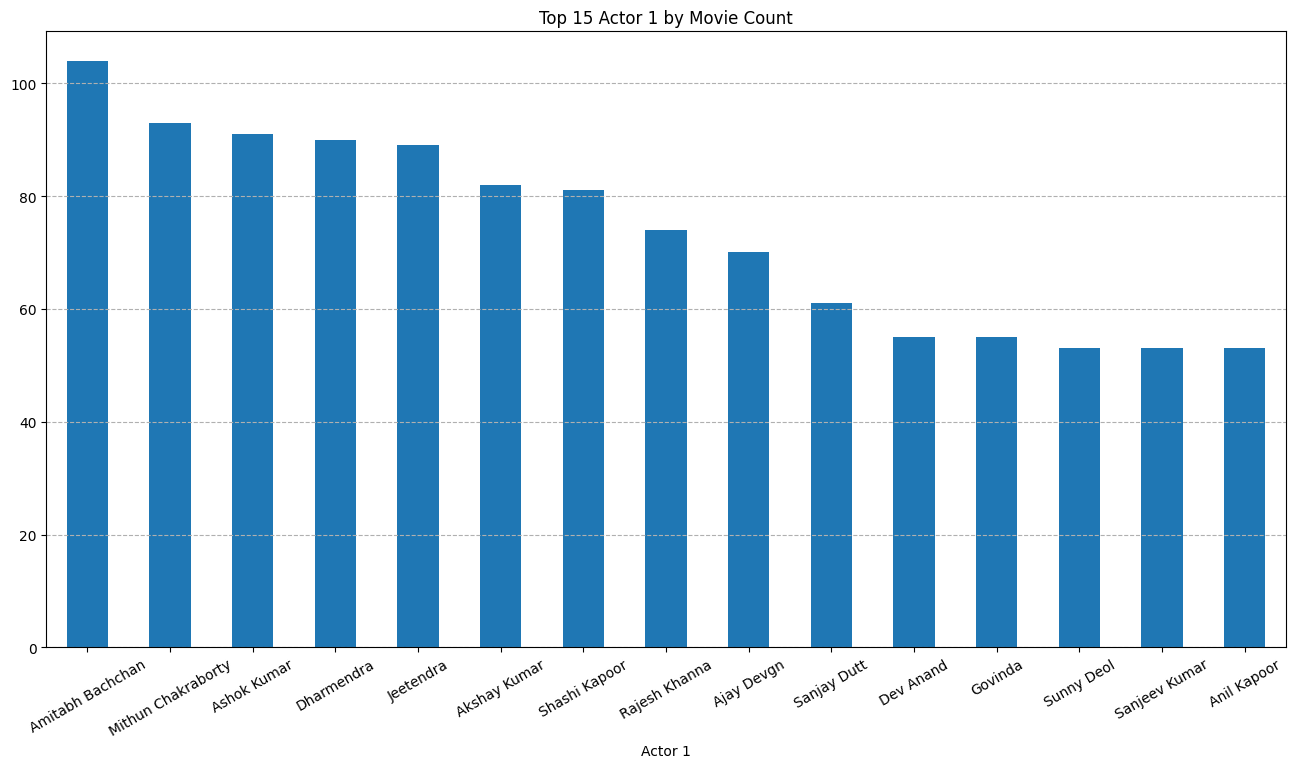

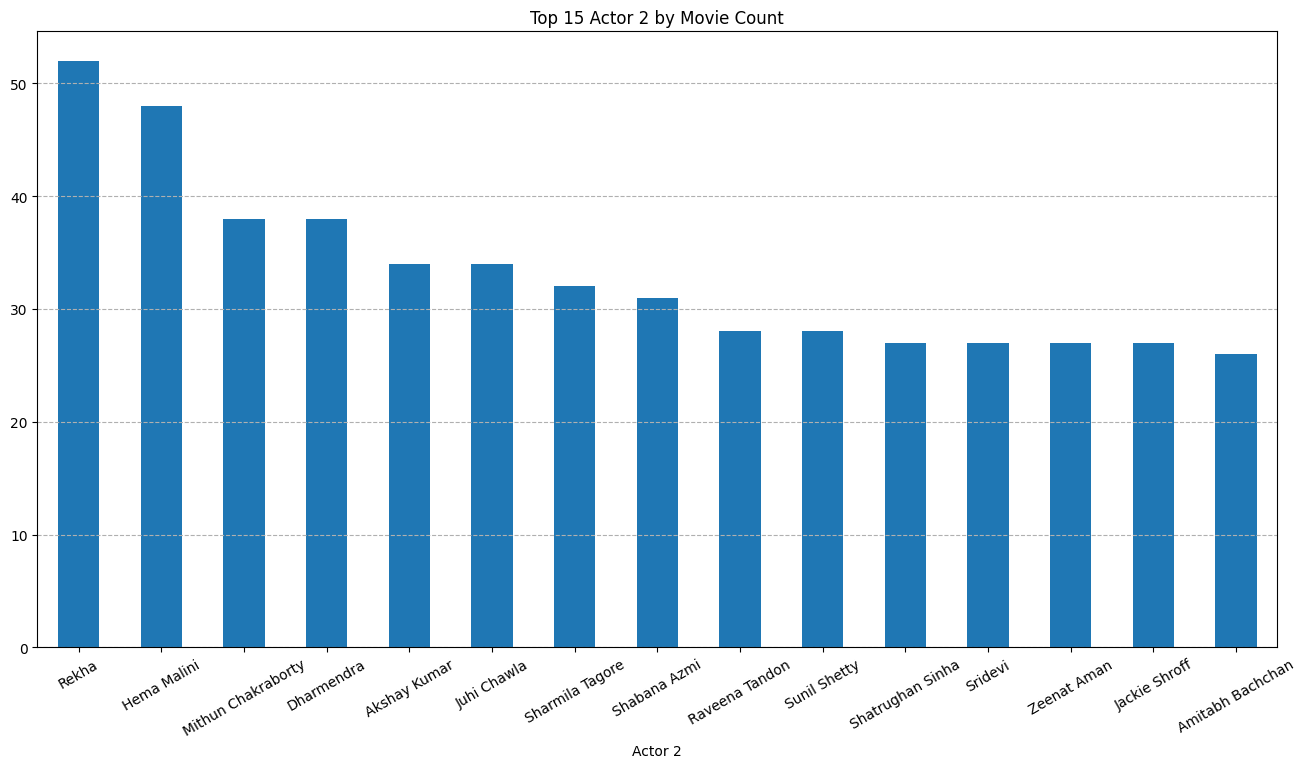

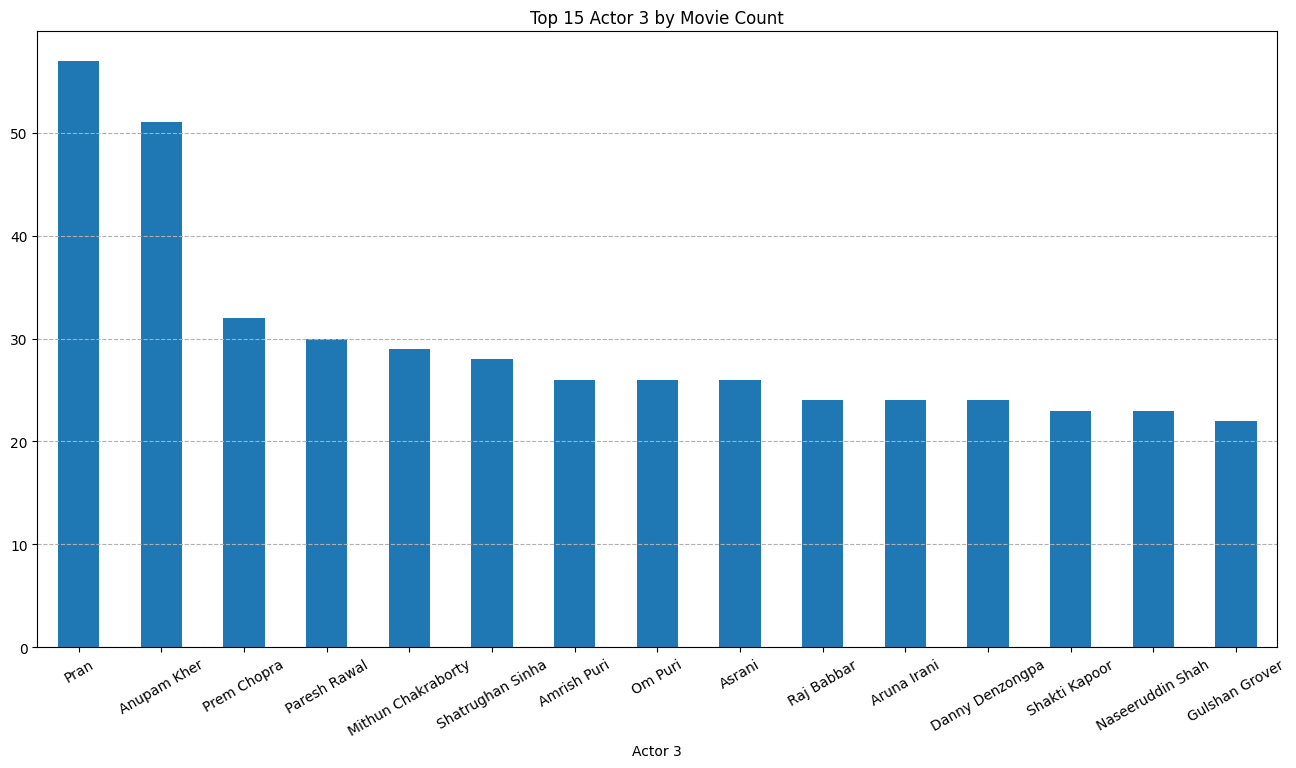

In [34]:
for i in cat:
    df[i].value_counts().head(15).plot(kind='bar', title=f'Top 15 {i} by Movie Count', figsize=(16,8))
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--')
    plt.show()

### Plotting Scatter plot to check if there is any correlation between the features - Rating, Movie Duration and Votes

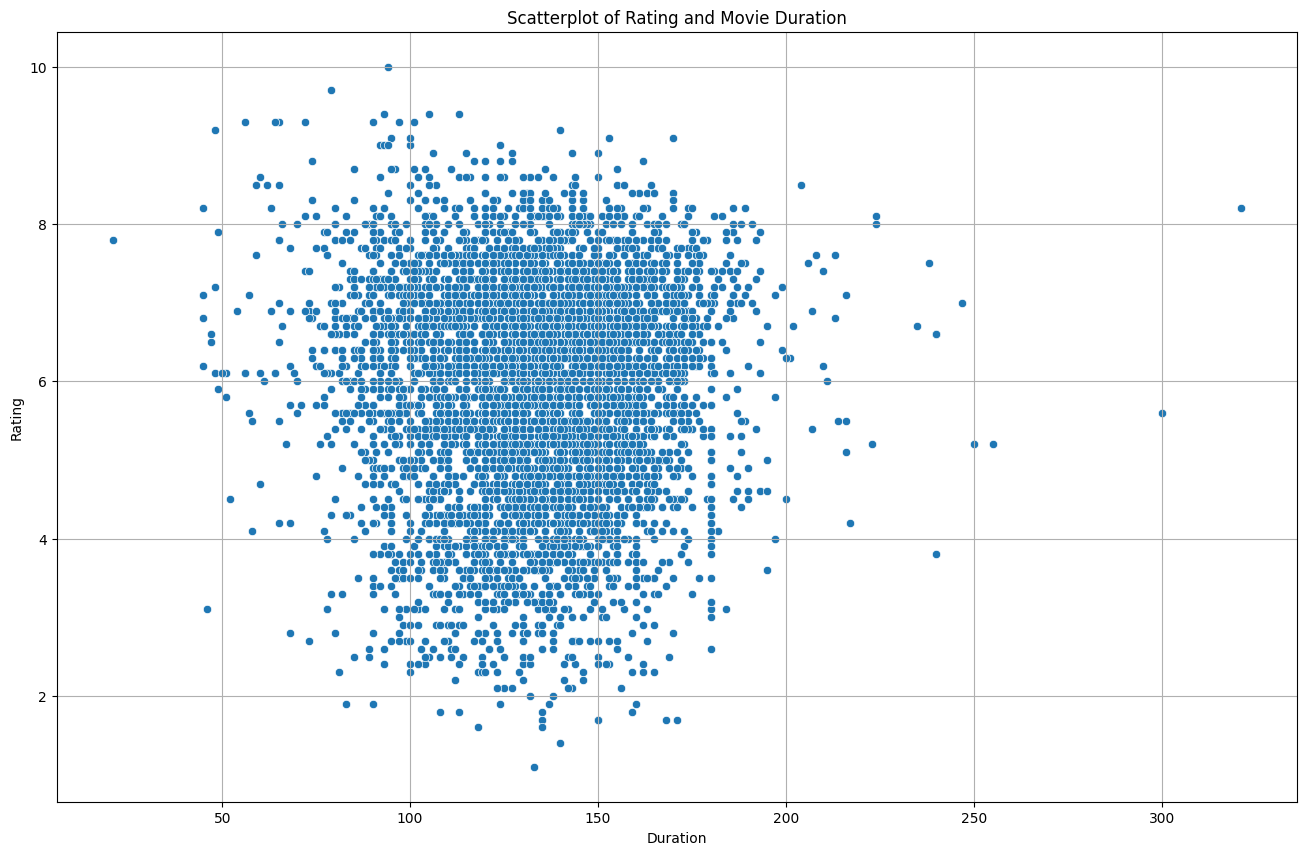

In [35]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df, x='Duration', y = 'Rating')
plt.title('Scatterplot of Rating and Movie Duration')
plt.grid()
plt.show()

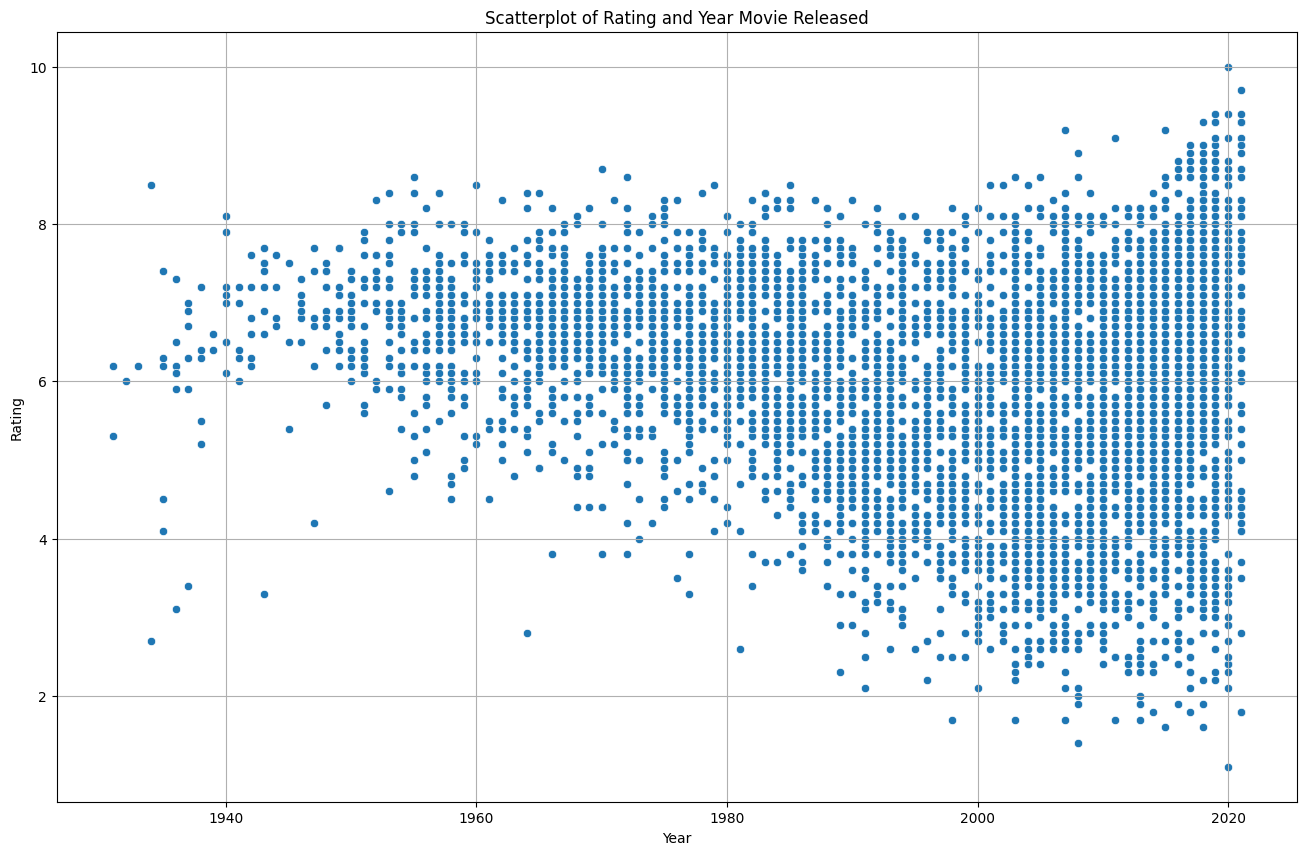

In [36]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df, x='Year', y = 'Rating')
plt.title('Scatterplot of Rating and Year Movie Released')
plt.grid()
plt.show()

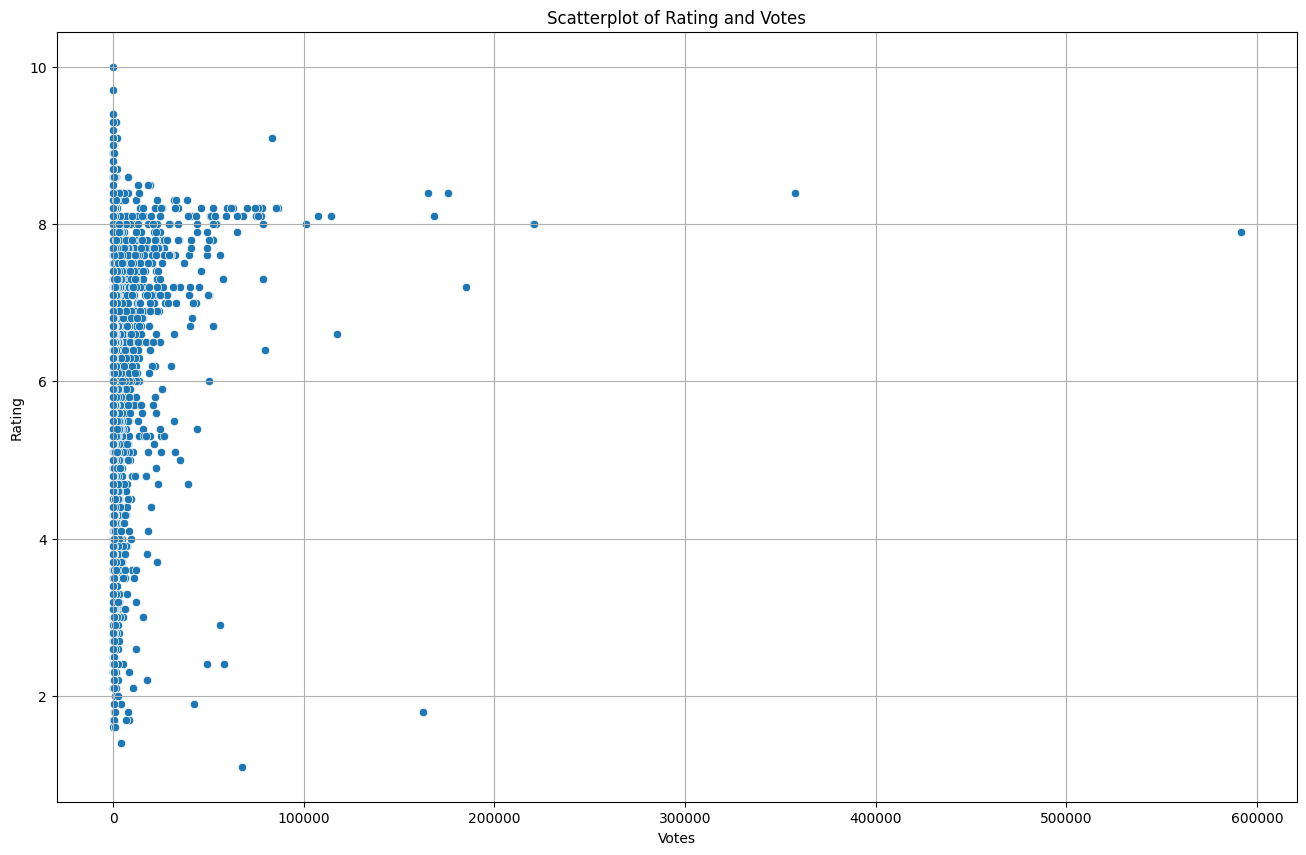

In [37]:
plt.figure(figsize=(16,10))
sns.scatterplot(data=df, x='Votes', y = 'Rating')
plt.title('Scatterplot of Rating and Votes')
plt.grid()
plt.show()

### Plotting Correlation Heatmap for the numerical featues

df[con].corr()

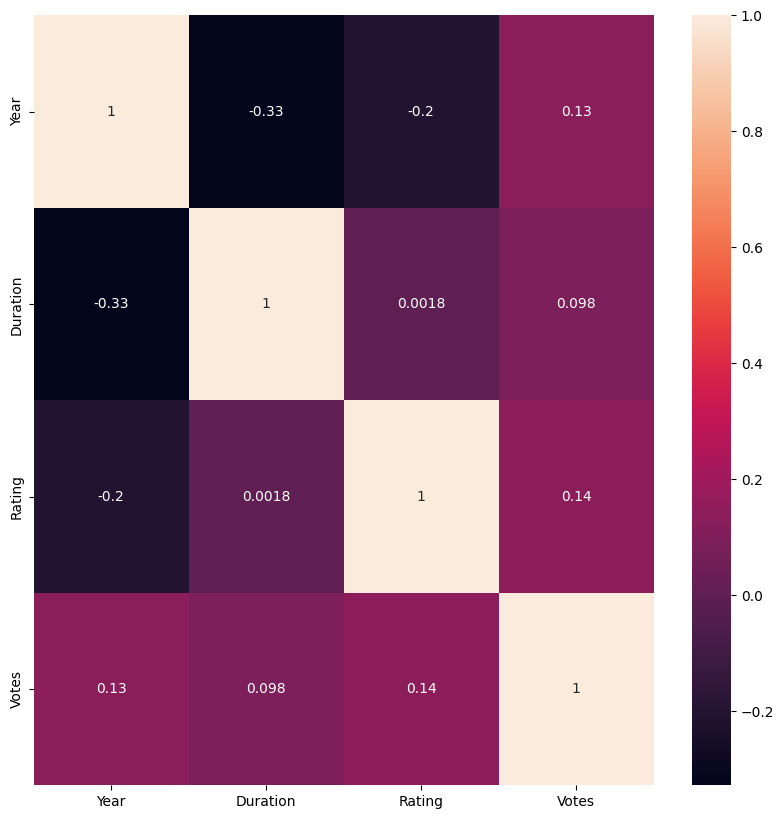

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df[con].corr(), annot=True)
plt.show()

### OBSERVATIONS:

1. The dataset has the movies that are mostly released between 2000-2020
2. Most of the movies has duration of about 100-175 minutes
3. Most of the movies rating range between 4.5-7.5
4. There want any correlation observed between rating, duration, votes and year
